In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
movies=pd.read_csv("aula0/ml-latest-small/movies.csv")
ratings=pd.read_csv("aula0/ml-latest-small/ratings.csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings.columns=['usuarioId','filmeId','nota','momento']

In [6]:
ratings.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Parte 1: Análise exploratória inicial dos dados de notas dadas aos filmes:
1. Quais são os valores de notas possíveis no dataframe de Notas (ratings)?
   * Podemos Checar usando o método `.unique()` da biblioteca pandas.
2.  Qual a distribuição dentro de cada valor de nota?
    *  Podemos checar usando o método `.value_counts()` da biblioteca Pandas.
3. Qual a média dessas notas?
   *  Podemos checar usando o método `.mean()` da biblioteca Pandas.

In [7]:
#Quais são os valores de notas possíveis?
ratings['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [8]:
ratings['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [9]:
print("Média:",ratings['nota'].mean())
print("Mediana:",ratings['nota'].median())

Média: 3.501556983616962
Mediana: 3.5


In [10]:
ratings['nota'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

### Construindo gráficos para observar a distribuição de Notas:
* Utilizando o `.plot()`  da bibliotéca Pandas;
* Utilizando a biblioteca Seaborn para criar o histograma mais visual;
* Utilizando `sns.boxplot()` para visualizar essa distribuição de outra forma.

<AxesSubplot:ylabel='Frequency'>

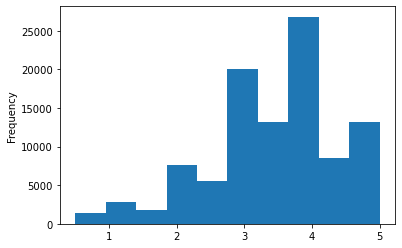

In [11]:
#Verificando a distribuição de notas por meio de um Histograma:
ratings['nota'].plot(kind='hist')

In [12]:
#Função para plotar um histograma usando Seaborn:
def seaborn_plot_histogram(df, column, title, xlabel, ylabel, bins=5):
    sns.set_style("whitegrid")
    sns.set_context("notebook")
    plt.figure(figsize=(8,4))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns.histplot(df[column], bins=bins)

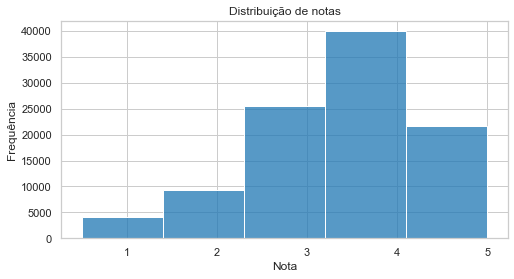

In [13]:
seaborn_plot_histogram(ratings, "nota", "Distribuição de notas", "Nota", "Frequência")

<AxesSubplot:title={'center':'Distribuição de Notas'}, xlabel='Nota'>

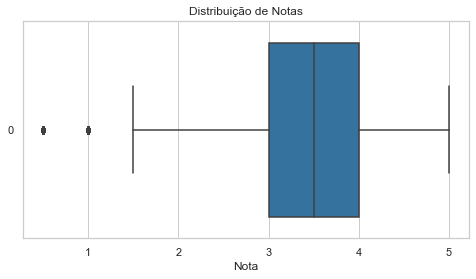

In [14]:
sns.set_style("whitegrid")
sns.set_context("notebook")
plt.figure(figsize=(8,4))
plt.title("Distribuição de Notas")
plt.xlabel("Nota")
sns.boxplot(data=ratings['nota'], orient='h', saturation=0.7)

#### Explorando os dados do arquivo `movies.csv`

In [15]:
movies.columns=['filmeId','titulo','generos']
movies.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


E como fazer se eu quiser olhar as notas de algúm desses filmes, lembrando, que as notas estão em outro `dataframe` chamado `ratings`  

Nesse caso, podemos observar que o indice em comum é o `movieId` presente em ambos os dataframes, podemos então buscar a partir dele:
* Iremos verificar as notas do filme **Toy Story**, que possui `movieId=1`:
  * Para isso usaremos o método `.query()` do pandas para fazer uma *consulta* aos dados

In [16]:
ratings.query("filmeId==1").head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


E se eu quiser ver apenas a média das notas?
* Faremos de duas formas:
  * Usando o método ´.query()´
  * Mais *Pythonist* sem usar nenhum método específico

In [17]:
ratings.query("filmeId==1").nota.mean()

3.9209302325581397

In [18]:
(ratings['nota'][ratings['filmeId']==1]).mean()

3.9209302325581397

Agora o objetivo é **agrupar as notas** baseado no `filmeId` com as **médias de notas** para cada filme:
* Para isso, utilizaremos o método `.groupby()` do Pandas.

In [19]:
medias_por_filme=ratings.groupby('filmeId')['nota'].mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<AxesSubplot:title={'center':'Distribuição de Médias de Notas por Filme'}, xlabel='Nota', ylabel='Count'>

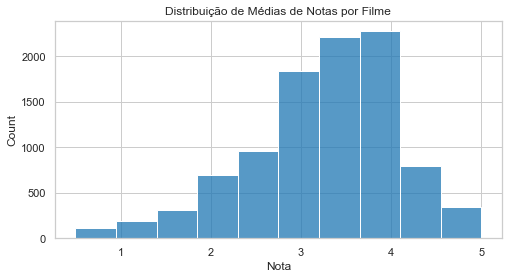

In [20]:
sns.set_style("whitegrid")
sns.set_context("notebook")
plt.figure(figsize=(8,4))
plt.title("Distribuição de Médias de Notas por Filme")
plt.xlabel("Nota")
sns.histplot(data=medias_por_filme, bins=10)

<AxesSubplot:title={'center':'Distribuição de Notas'}, xlabel='nota'>

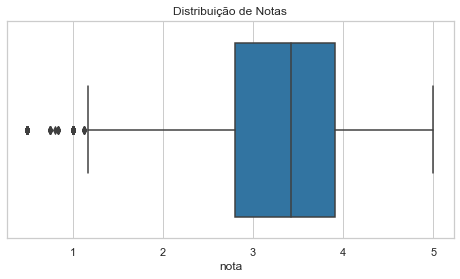

In [21]:
sns.set_style("whitegrid")
sns.set_context("notebook")
plt.figure(figsize=(8,4))
plt.title("Distribuição de Notas")
plt.xlabel("Nota")
sns.boxplot(x=medias_por_filme)

E se agora eu quiser **juntar** a série de *médias de notas* ao meu `DataFrame` de filmes, como uma nova coluna chama `notas_media`:
* Podemos fazer isso, usando o método ` ` da bibliotéca Pandas.

### Parte 2: Explorando o Dataset do TMBD de 5000 Filmes para estudar tipos de variáves!



In [22]:
tmdb=pd.read_csv("aula0/tmdb-5000-db/tmdb_5000_movies.csv")

In [23]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Analizando a variável `tmdb['original_language']`:
* É uma variável categórica:
  * Não possui ordem de vlaor (como uma numérica);
  * Como existe um nome para cada categoria, podemos chamar de **categórica nominal**.

**IMPORTANTE**:
Se olharmos para variáveis como por exemplo, *Grau de escolaridade*:
- Primeiro Grau;
- Segundo Grau;
- Terceiro Grau.

Teremos um tipo de variáverl chamada de `categórica ordinal` pois existe uma ordem de relevancia entre elas, ainda assim, como não existe uma distancia definida entre os graus, nao podemos submete-las a operações aritiméticas (soma, subtração, etc.)

In [24]:
tmdb["original_language"].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

Analizando a variável `tmdb['budget']`:
* É uma **variável quantitativa continua**:
  * Descreve um valor numérico, quantitativo e continuo, ou seja, nao possui intervlaos definidos
  * Com esse tipo de variável podemos fazer operações aritiméticas.

Existe também **outro tipo de variável quantitativa**:
* Por exemplo se olharmos as notas dos filmes no database do MovieLens `ratings['nota']`, podemos perceber que elas variam de 0,5 em 0,5:
  * Esse tipo de variável é chamado de **variável quantitativa discreta**.

In [25]:
tmdb["budget"].head()

0    237000000
1    300000000
2    245000000
3    250000000
4    260000000
Name: budget, dtype: int64

In [26]:
ratings["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

#### Continuando a análise exploratória dos dados do TMDB de 5000 Filmes:
* Aqui, queremos contar quantos filmes temos em cada idioma `original_language`:
  * Usaremos o método `.value_counts()` da bibliotéca pandas e chamando o método `.to_frame()` para converter em dataframe;
  * Além disso, para deixar os dados mais apresentáveis, iremos renomear as colunas com o método `.columns=['col1','col2',...,'coln']`

* Na sequencia iremos visualizar as categorias de forma grafica, usando algúm plor para comparar as categorias:
  * Usaremos um gráfico de barras, feito usando `sns.catplot()`

In [27]:
contagem_lingua=tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_lingua.columns=['original_language','total']
contagem_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


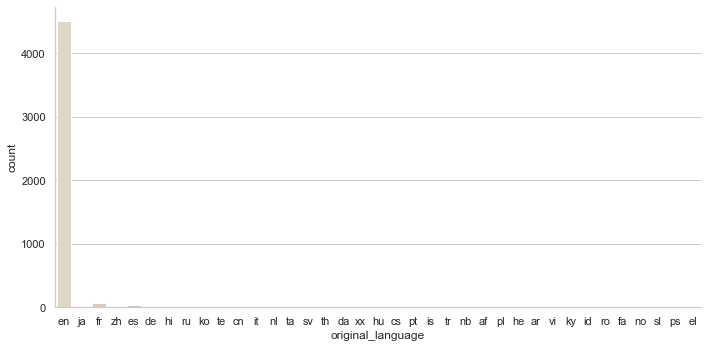

In [28]:
sns.catplot(x="original_language",kind="count",palette="ch:.25", data=tmdb,
            row_order=contagem_lingua.sort_values("total",ascending=False)["original_language"], aspect=2)

([<matplotlib.patches.Wedge at 0x1e864a78f10>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

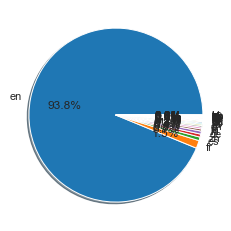

In [29]:
#Esse é um gráfico de pizza, que mostra a porcentagem de filmes de cada língua. Porém esse tipo de gráfico deve ser sempre evitado!
plt.pie(contagem_lingua["total"], labels=contagem_lingua["original_language"], autopct='%1.1f%%', shadow=True)

#### IMPORTANTE: Entenda os seus dados antes de tomar a decisão de que gráfico escolher!!

Agora que utilizamos duas formas **horrendas** de plotagem para explorar esses dados:
* Iremos somar todas as liguas, exceto *inglês* para comparar de maneira melhor a quantidade de filmes com esses idiomas. Afinal, já vimos que o inglês representa mais de 90% do total de filmes nesse dataset;
* E em seguida, iremos olhar somente para os `outros`, os idimas restantes sem o inglês.

In [30]:
total_ingles=tmdb["original_language"].value_counts()["en"]
total_geral=tmdb["original_language"].value_counts().sum()
total_restante=total_geral-total_ingles
print(total_ingles, total_restante)

4505 298


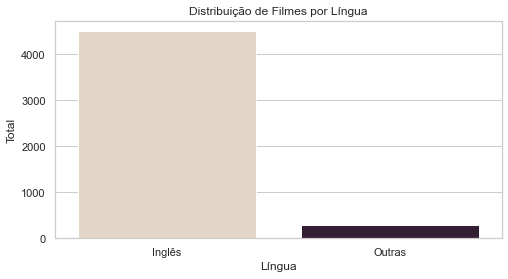

In [31]:
dados_lingua=pd.DataFrame({"Lingua": ["Inglês", "Outras"], "Total": [total_ingles, total_restante]})
dados_lingua

#plotando:
sns.set_style("whitegrid")
sns.set_context("notebook")
plt.figure(figsize=(8,4))
ax=sns.barplot(x="Lingua", y="Total", data=dados_lingua, palette="ch:.25")
ax.set(xlabel="Língua", ylabel="Total", title="Distribuição de Filmes por Língua")
plt.show()

In [32]:
dados_sem_en=tmdb.query("original_language!='en'")
total_sem_ingles=dados_sem_en["original_language"].value_counts().to_frame().reset_index().rename(columns={"index":"original_language", "original_language":"total"})
total_sem_ingles.head()

,original_language,total
0,fr,70
1,es,32
2,zh,27
3,de,27
4,hi,19


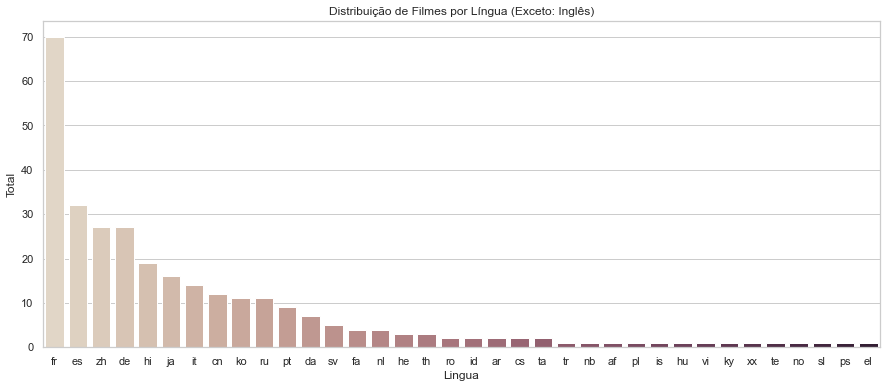

In [33]:
#plotando e refinando a visualização:
sns.set_style("whitegrid")
sns.set_context("notebook")
plt.figure(figsize=(15,6))
ax=sns.barplot(x="original_language", y="total", data=total_sem_ingles, palette="ch:.25")
ax.set(xlabel="Lingua", ylabel="Total", title="Distribuição de Filmes por Língua (Exceto: Inglês)")
plt.show()

##### Plotando o mesmo gráfico usando o método `.catplot()` do seaborn:

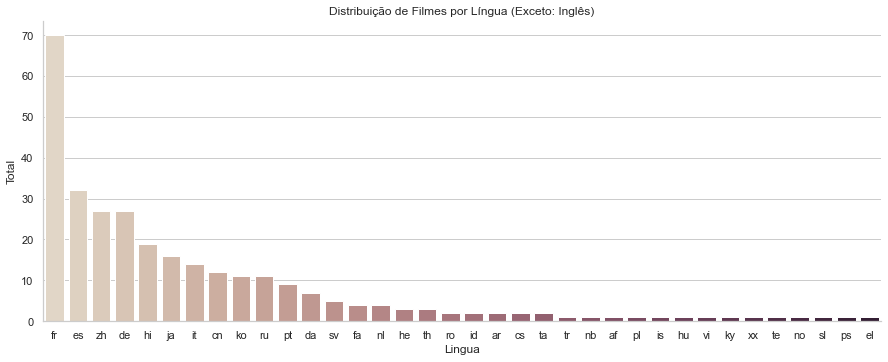

In [34]:
ax=sns.catplot(x="original_language",y='total',kind='bar', data=total_sem_ingles,
                palette="ch:.25", aspect=2.5,
                row_order=total_sem_ingles.sort_values("total",ascending=False)["original_language"])

ax.set(xlabel="Lingua", ylabel="Total", title="Distribuição de Filmes por Língua (Exceto: Inglês)")
plt.show()


### Unindo dois gráficos em uma mesma figura:
Agora que temos um gráfico mostrando a **relação do inglês com outras linguas** e um mostrando a **distribuição dessas outras**, devemos uni-los em uma mesma figura para contar uma história melhor:

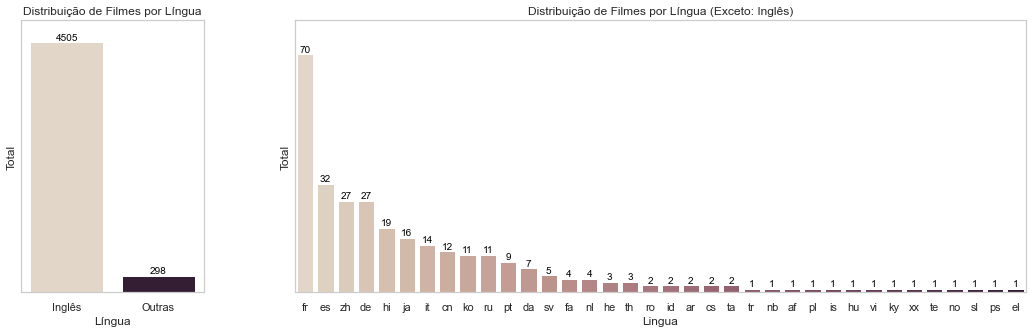

In [35]:
fig, axs = plt.subplots(ncols=2, figsize=(18,5), gridspec_kw={'width_ratios': [1, 4]})

ax1=sns.barplot(x="Lingua", y="Total", data=dados_lingua, palette="ch:.25", ax=axs[0])
ax2=sns.barplot(x="original_language", y="total", data=total_sem_ingles, palette="ch:.25",ax=axs[1])
ax1.set(xlabel="Língua", ylabel="Total", title="Distribuição de Filmes por Língua", ylim=(0,4900), yticks=[])
ax2.set(xlabel="Lingua", ylabel="Total", title="Distribuição de Filmes por Língua (Exceto: Inglês)", ylim=(0,80), yticks=[])

# Adicionando rotulo com valores no gráfico ax1:
for p in ax1.patches:
            ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adicionando rotulo com valores no gráfico ax2:
for p in ax2.patches:
            ax2.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


### Parte 3: Revisando o papel da Médias, mediana, desvio padarão, boxplot, histograma, tendência central e dispersão e como isso se encaixa, usando os datasets de Filmes:

In [36]:
movies.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [37]:
notas_toystory=ratings.query("filmeId==1")
notas_jumanji=ratings.query("filmeId==2")
print("Quantidade de avaliações do filme Toy Story:", len(notas_toystory))
print("Quantidade de avaliações do filme Jumanji:", len(notas_jumanji))
print("Nota Média do filme Toy Story: %.2f" %notas_toystory["nota"].mean())
print("Nota Média do filme Jumanji: %.2f" %notas_jumanji["nota"].mean())
print("Mediana das notas do filme Toy Story: %.2f" %notas_toystory["nota"].median())
print("Mediana das notas do filme Jumanji: %.2f" %notas_jumanji["nota"].median())

Quantidade de avaliações do filme Toy Story: 215
Quantidade de avaliações do filme Jumanji: 110
Nota Média do filme Toy Story: 3.92
Nota Média do filme Jumanji: 3.43
Mediana das notas do filme Toy Story: 4.00
Mediana das notas do filme Jumanji: 3.50


Acima temos a quantidade de avaliações dos filmes, nota média e a mediana, porém isso não diz muito por exemplo, isso não me diz quantas pessoas odiaram (deram as menores notas) o filme, ou quantas pessoas amaram o filme (deram as maiores notas), se a diferença de número entre essas pessoas é grande ou pequena, tudo isso são informações perdidas quando olhamos somente a média, mediana ou moda.  
  
Essas informações podem ser vistas analisando a distribuição dessas notas, e para isso, podemos usar alguns tipos de funções ou gráficos, como o histograma ou o boxplot.

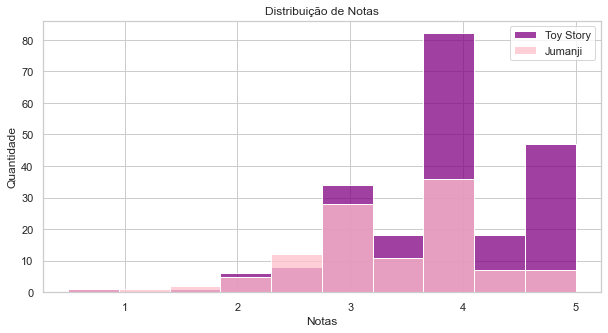

In [38]:
sns.set_style("whitegrid")
sns.set_context("notebook")
plt.figure(figsize=(10,5))
ax=sns.histplot(notas_toystory["nota"], bins=10, kde=False, label="Toy Story", color="purple")
ax=sns.histplot(notas_jumanji["nota"], bins=10, kde=False, label="Jumanji", color="pink")
ax.set(xlabel="Notas", ylabel="Quantidade", title="Distribuição de Notas")
plt.legend()
plt.show()

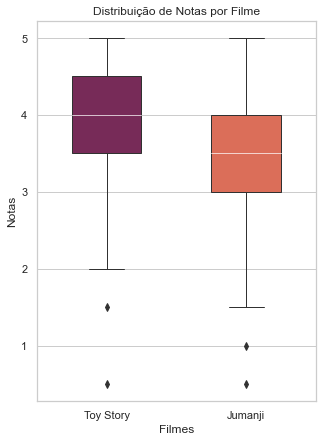

In [39]:
sns.set_style("whitegrid")
sns.set_context("notebook")
plt.figure(figsize=(5,7))
ax=sns.boxplot(x="filmeId", y="nota", data=ratings.query("filmeId in [1,2]"),
            palette="rocket", order=[1,2], width=.5, linewidth=1,
            medianprops=dict(color="white", alpha=0.7))
ax.set(xlabel="Filmes", ylabel="Notas", title="Distribuição de Notas por Filme", xticklabels=["Toy Story", "Jumanji"])
plt.show()

E se eu quiser saber o quanto esses dados de notas fogem de uma tendência central (média)?  
  
Para isso, usamos o desvio pargão:

In [40]:
print("O desvio padrão das notas do filme Toy Story é: %.2f" %notas_toystory["nota"].std())
print("O desvio padrão das notas do filme Jumanji é: %.2f" %notas_jumanji["nota"].std())

O desvio padrão das notas do filme Toy Story é: 0.83
O desvio padrão das notas do filme Jumanji é: 0.88
